In [14]:
from typing import TypedDict

class portfoliostate(TypedDict):
    amount_usd: float
    total_usd:float
    total_inr:float

    

In [19]:
def calc_total(state:portfoliostate)->portfoliostate:
    state["total_usd"]= state["amount_usd"]*1.08
    return state

def convert_to_inr(state:portfoliostate)->portfoliostate:
    state["total_inr"]= state["total_usd"]*90.0
    return state

In [20]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(portfoliostate)

builder.add_node("calc_total_node",calc_total)
builder.add_node("convert_to_inr_node",convert_to_inr)

builder.add_edge(START,"calc_total_node")
builder.add_edge("calc_total_node","convert_to_inr_node")
builder.add_edge("convert_to_inr_node",END)

graph = builder.compile()

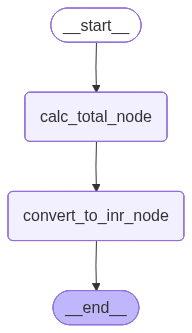

In [21]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:

graph.invoke({"amount_usd": 1000.00})

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_inr': 97200.0}